# Emissão de gás carbônico por montadoras mais comuns em atividade no Brasil.

A ideia é criar um modelo de análise de impacto da emissão de gás carbônico das montadoras de carros mais comuns presentes no país levando em consideração suas taxas de poluíção atmosférica.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Carregando as bibliotecas 

In [2]:
import pandas as pd 
import matplotlib as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importando a base de dados e organizando a base de dados
Essa base de dados já foi alterada, sendo filtrada as variáveis de interesse, modelos de carros e montadoras mais comuns presentes no Brasil.

Variáveis de interesse:
 - Ano do Modelo
 - Fabricante
 - Modelo do Veículo 
 - Consumo de combustível na cidade (L/100km)
 - Emissão de CO2 (g/km) 
 - Classificação de emissão de CO2 (2 a 9)
 - Classificação de poluição atmosférica (1 a 7)


Fabricantes de Interesse:

 - Ford
 - Chevrolet
 - Toyota
 - BMW
 - Jeep
 - Hyundai
 - Nissan
 - KIA
 - Honda
 - Mitsubishi
 - FIAT

Modelos de Interesse:
 - SUV pequeno
 - Caminhonete padrão
 - SUV padrão
 - Tamanho médio
 - Compactos 

In [3]:
dados = pd.read_csv('/content/drive/MyDrive/Formação - Data Science/Colab Notebooks/Treinamentos Kaggle/Base Fatiada 2.csv', sep = ',')

In [4]:
dados.head()

,Unnamed: 0,Model Year,Make,Vehicle Class,Fuel Consumption (City (L/100 km),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,0,2022,BMW,Compact,9.5,195,6,7
1,1,2022,BMW,Mid-size,10.1,206,6,7
2,2,2022,BMW,Mid-size,13.9,279,4,3
3,3,2022,BMW,SUV: Standard,15.7,321,3,3
4,4,2022,BMW,Compact,10.4,214,5,3


In [5]:
dados.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
# Alterando o nome das variáveis

dados.rename(columns = {'Model Year': 'Ano do Modelo', 'Make': 'Fabricante', 'Vehicle Class': 'Modelo',
                        'Fuel Consumption (City (L/100 km)': 'Consumo de combustível na cidade (L/100 km)',
                        'CO2 Emissions(g/km)': 'Emissão de CO2 (g/km)', 'CO2 Rating': 'Classificação de emissão de CO2 (2 a 9)',
                        'Smog Rating': 'Classificação de poluição atmosférica (1 a 7)'}, inplace = True)

In [7]:
dados.head()

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
0,2022,BMW,Compact,9.5,195,6,7
1,2022,BMW,Mid-size,10.1,206,6,7
2,2022,BMW,Mid-size,13.9,279,4,3
3,2022,BMW,SUV: Standard,15.7,321,3,3
4,2022,BMW,Compact,10.4,214,5,3


# Análise exploratória dos dados 

In [8]:
# tamanho da base 

dados.shape

(312, 7)

In [9]:
# buscando NA's

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ano do Modelo                                  312 non-null    int64  
 1   Fabricante                                     312 non-null    object 
 2   Modelo                                         312 non-null    object 
 3   Consumo de combustível na cidade (L/100 km)    312 non-null    float64
 4   Emissão de CO2 (g/km)                          312 non-null    int64  
 5   Classificação de emissão de CO2 (2 a 9)        312 non-null    int64  
 6   Classificação de poluição atmosférica (1 a 7)  312 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 17.2+ KB


In [10]:
# analisando as estatísticas descritivas 

dados.describe().round(2)

# Assim, não vemos nenhuma anormalidade nos dados, como outliers

,Ano do Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
count,312.0,312.00,312.00,312.00,312.00
mean,2022.0,12.01,252.29,4.70,5.31
std,0.0,3.52,65.80,1.64,1.45
min,2022.0,4.40,103.00,2.00,1.00
25%,2022.0,9.30,195.00,3.00,5.00
50%,2022.0,11.80,256.00,5.00,6.00
75%,2022.0,14.62,304.50,6.00,6.00
max,2022.0,23.10,387.00,9.00,7.00


## Análise Gráfica e de correlações

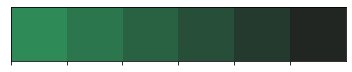

In [11]:
sns.set_theme(sns.palplot(sns.dark_palette('seagreen', reverse = True)))


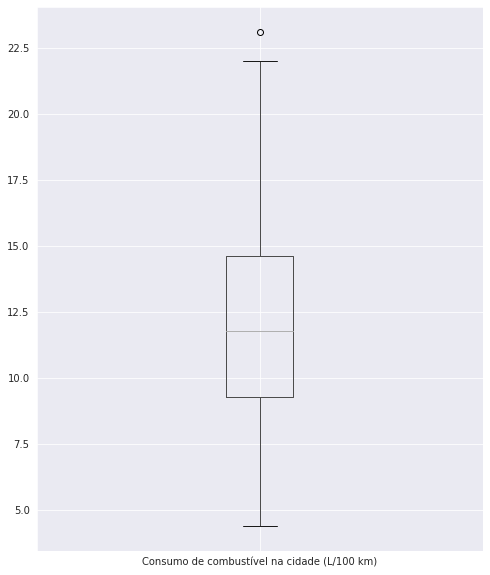

In [12]:
dados.boxplot('Consumo de combustível na cidade (L/100 km)', figsize = (8, 10 ))

In [13]:
# gerando uma matriz de correlação 
dados.corr().round(2)

,Ano do Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
Ano do Modelo,NaN,NaN,NaN,NaN,NaN
Consumo de combustível na cidade (L/100 km),NaN,1.00,0.94,-0.92,-0.37
Emissão de CO2 (g/km),NaN,0.94,1.00,-0.98,-0.39
Classificação de emissão de CO2 (2 a 9),NaN,-0.92,-0.98,1.00,0.41
Classificação de poluição atmosférica (1 a 7),NaN,-0.37,-0.39,0.41,1.00


Assim, percebe-se que existe correlações fortes entre o consumo de combustível e a emissão de gás carbônico, bem como uma correlação entre o consumo e a classificação de emissão 

Analisando as correlações graficamente:

Text(0.5, 1.1, 'Consumo de combustível na cidade (L/100 km) X Emissão de CO2 (g/km)')

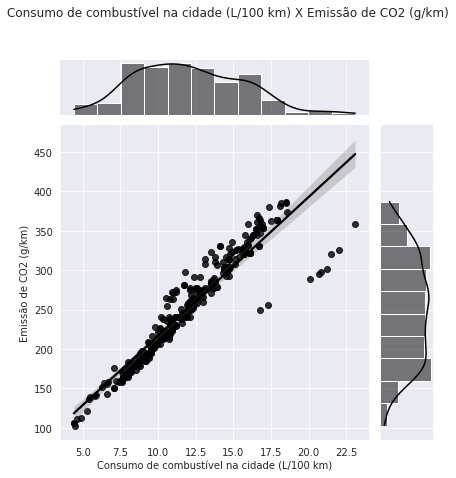

In [14]:
figura_correlacao1 = sns.jointplot(data = dados, x = 'Consumo de combustível na cidade (L/100 km)',
              y = 'Emissão de CO2 (g/km)', kind = 'reg', color = 'black')

figura_correlacao1.fig.suptitle('Consumo de combustível na cidade (L/100 km) X Emissão de CO2 (g/km)',
                                y = 1.10)

Text(0.5, 1.0, 'Histograma de Distribuição do consumo de combustível')

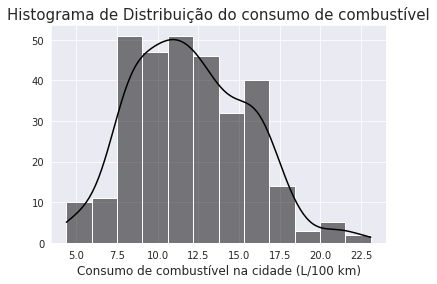

In [15]:

histograma_de_consumo = sns.histplot(data = dados, x = 'Consumo de combustível na cidade (L/100 km)',
                                     kde = True,
                                     color = 'Black')

histograma_de_consumo.set_xlabel('Consumo de combustível na cidade (L/100 km)', fontsize = (12))
histograma_de_consumo.set_ylabel(' ')
histograma_de_consumo.set_title('Histograma de Distribuição do consumo de combustível',
                                fontsize = 15)

Text(0.5, 1.1, 'Consumo de combustível na cidade (L/100 km) X Classificação de emissão de CO2 (2 a 9)')

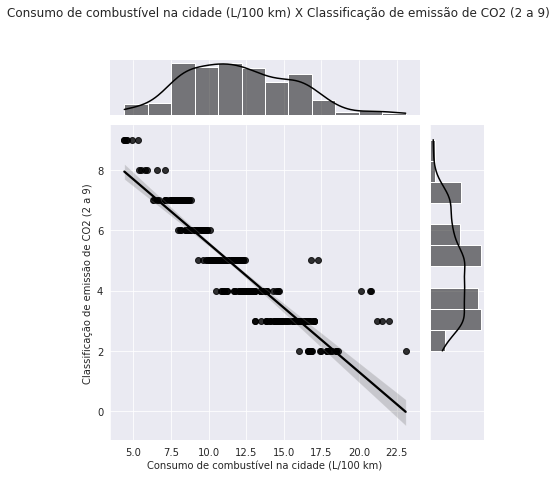

In [16]:
figura_de_correlacao2 = sns.jointplot(data = dados, x = 'Consumo de combustível na cidade (L/100 km)',
              y = 'Classificação de emissão de CO2 (2 a 9)', color = 'black',
              kind = 'reg')

figura_de_correlacao2.fig.suptitle('Consumo de combustível na cidade (L/100 km) X Classificação de emissão de CO2 (2 a 9)',
                                   fontsize = 12, y = 1.10)


## Analisando graficamente as variáveis categóricas 

Text(0, 0.5, ' ')

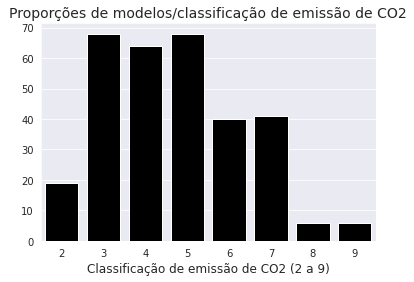

In [17]:
grafico_categorico1 = sns.countplot(data = dados, x = 'Classificação de emissão de CO2 (2 a 9)',
              color = 'black')

grafico_categorico1.set_title('Proporções de modelos/classificação de emissão de CO2', fontsize = 14)
grafico_categorico1.set_xlabel('Classificação de emissão de CO2 (2 a 9)',
                               fontsize = 12)
grafico_categorico1.set_ylabel(' ')

Text(0, 0.5, ' ')

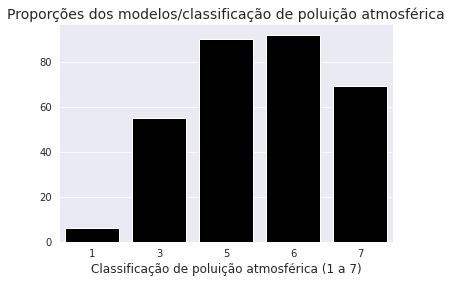

In [18]:
grafico_categorico2 = sns.countplot(data = dados, x = 'Classificação de poluição atmosférica (1 a 7)',
                                    color = 'black')
grafico_categorico2.set_title('Proporções dos modelos/classificação de poluição atmosférica',
                              fontsize = 14)
grafico_categorico2.set_xlabel('Classificação de poluição atmosférica (1 a 7)',
                               fontsize = 12)
grafico_categorico2.set_ylabel(' ')

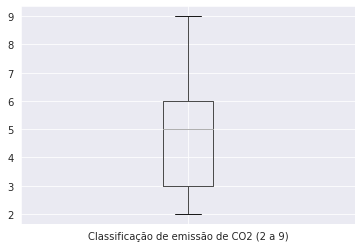

In [19]:
# identificando intervalos para as filtragens 
dados.boxplot('Classificação de emissão de CO2 (2 a 9)')

#Filtrando os dados
Filtrando os dados partindo dos modelos que consomem acima da mediana de consumo por fabricante e também possuem classificação de emissão acima da mediana (5).

In [20]:
# Encontrando a mediana
dados['Consumo de combustível na cidade (L/100 km)'].median()

11.8

In [21]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64

In [22]:
# filtragem da ford
selecao = (dados['Fabricante'] == 'Ford') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_ford = dados[selecao]
filtragem_ford

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
127,2022,Ford,SUV: Standard,12.0,252,5,6
132,2022,Ford,Pickup truck: Standard,12.1,256,5,6
135,2022,Ford,Pickup truck: Standard,16.8,249,5,6
144,2022,Ford,Pickup truck: Standard,17.3,256,5,6
159,2022,Ford,Pickup truck: Standard,11.9,256,5,6


In [23]:
filtragem_ford['Emissão de CO2 (g/km)'].mean()

253.8

Verifica-se que a Ford possui 5 modelos que consomem acima de 11,8 litros por 100 km rodados e que possuam a classificação igual ou acima de 5 e com emissão média de CO2 de 253.8 gramas por km rodado de um total de 62 modelos

In [24]:
# filtragem Chevrolet 
selecao = (dados['Fabricante'] == 'Chevrolet') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_chevrolet = dados[selecao]
filtragem_chevrolet

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
39,2022,Chevrolet,SUV: Small,12.3,252,5,6


Verifica-se que a Chevrolet possui 1 modelo que consome acima de 11,8 litros por 100 km rodados e que possua a classificação igual ou acima de 5 e com emissão média de CO2 de 252 gramas por km rodado de um total de 61 modelos

In [25]:
# filtragem Toyota  
selecao = (dados['Fabricante'] == 'Toyota') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_Toyota = dados[selecao]
filtragem_Toyota

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)


In [26]:
# selecao = dados['Fabricante'] == 'Toyota'

# x = dados[selecao]
# x.head(20)

Verifica-se que a Toyota não possui modelos que consomem acima de 11,8 litros por 100 km rodados e que tenham a classificação igual ou acima de 5. Entretanto, por mais que seus modelos consumam menos, eles agridem mais o meio ambiente, visto que muitos de seus modelos possuem classificações maiores ou iguais a 5. Isto é, os modelos da Toyota consomem menos, porém polui mais.

In [27]:
# filtragem_BMW  
selecao = (dados['Fabricante'] == 'BMW') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_BMW  = dados[selecao]
filtragem_BMW 

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
36,2022,BMW,SUV: Standard,12.1,256,5,3


Verifica-se que a BMW possui 1 modelo que consome acima de 11,8 litros por 100 km rodados e que possua a classificação igual ou acima de 5 e com emissão média de CO2 de 256 gramas por km rodado de um total de 38 modelos.

In [28]:
# filtragem_Jeep  
selecao = (dados['Fabricante'] == 'Jeep') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_Jeep  = dados[selecao]
filtragem_Jeep 

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
196,2022,Jeep,SUV: Small,11.9,240,5,5
199,2022,Jeep,SUV: Small,12.2,249,5,5
207,2022,Jeep,SUV: Standard,12.3,256,5,7


In [29]:
filtragem_Jeep['Emissão de CO2 (g/km)'].mean()

248.33333333333334

Verifica-se que a Jeep possui 3 modelos que consomem acima de 11,8 litros por 100 km rodados e que tenham a classificação igual ou acima de 5 e com emissão média de CO2 de 248,33 gramas por km rodado de um total de 34 modelos.

In [30]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64

In [31]:
# filtragem_Hyundai  
selecao = (dados['Fabricante'] == 'Hyundai') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_Hyundai  = dados[selecao]
filtragem_Hyundai 

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
176,2022,Hyundai,Mid-size,12.1,241,5,3
190,2022,Hyundai,Compact,12.0,248,5,3


In [32]:
filtragem_Hyundai['Emissão de CO2 (g/km)'].mean()

244.5

Verifica-se que a Hyundai possui 2 modelos que consomem acima de 11,8 litros por 100 km rodados e que tenham a classificação igual ou acima de 5 e com emissão média de CO2 de 244.5 gramas por km rodado de um total de 22 modelos.

In [33]:
# filtragem_Nissan  
selecao = (dados['Fabricante'] == 'Nissan') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_Nissan  = dados[selecao]
filtragem_Nissan

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)


In [34]:
selecao = dados['Fabricante'] == 'Nissan'

x = dados[selecao]
x.head(20)

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
251,2022,Nissan,Mid-size,9.1,186,6,7
252,2022,Nissan,Mid-size,9.3,190,6,7
253,2022,Nissan,SUV: Standard,17.5,362,2,3
254,2022,Nissan,Pickup truck: Standard,12.8,266,4,5
255,2022,Nissan,Pickup truck: Standard,13.7,288,4,5
256,2022,Nissan,Mid-size,7.7,169,7,7
257,2022,Nissan,Mid-size,11.6,233,5,3
258,2022,Nissan,SUV: Small,11.6,246,5,5
259,2022,Nissan,SUV: Small,7.8,169,7,6
260,2022,Nissan,SUV: Small,9.0,190,6,7


A fabricante Nissan merece uma atenção especial. Pois seus modelos não se enquadram no critério de consumo acima de 11,8 e classificação igual ou acima de 5. No entanto, muitos modelos possuem consumo maiores que 11,8 litros por km e, também, classificações bem acima de 5. 

Dessa forma, um filtro diferente será aplicado. Este filtro consistirá em selecionar apenas os modelos com classificação acima de 5 (que agridem mais o meio ambiente).

In [35]:
selecao = (dados['Fabricante'] == 'Nissan') & (dados['Classificação de emissão de CO2 (2 a 9)'] >= 5)
filtragem_Nissan2 = dados[selecao]
filtragem_Nissan2.shape

filtragem_Nissan2['Emissão de CO2 (g/km)'].mean()

186.8125

Dessa forma, verificamos que existem 16 modelos da fabricante Nissa que possuem uma classificação acima de 5 agredindo o meio ambiente, com emissão média de 186,81 gramas de carbono por quilometro rodado. Isto é, de um total de 19 modelos, apenas 3 modelos geram menos impacto no meio ambiente. 

In [36]:
# filtragem_Kia  
selecao = (dados['Fabricante'] == 'Kia') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_Kia  = dados[selecao]
filtragem_Kia

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)


In [37]:
selecao = dados['Fabricante'] == 'Kia'

x = dados[selecao]
x.head(20)

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
228,2022,Kia,Mid-size,8.7,184,6,5
229,2022,Kia,Mid-size,7.9,165,7,5
230,2022,Kia,Mid-size,8.8,178,7,5
231,2022,Kia,Compact,7.2,159,7,3
232,2022,Kia,Compact,7.7,166,7,3
233,2022,Kia,SUV: Small,8.2,182,6,5
234,2022,Kia,SUV: Small,9.4,205,6,5
235,2022,Kia,SUV: Small,8.8,195,6,5
236,2022,Kia,SUV: Small,10.9,234,5,5
237,2022,Kia,SUV: Small,10.1,227,5,5


Assim como a Nissan, a Kia também não possui modelos que enquadrem dentro dos critérios estabelecidos. Porém, muitos de seus modelos possuem classificação igual ou acima de 5. Dessa forma, também aplicaremos um filtro diferente.

In [38]:
selecao = (dados['Fabricante'] == 'Kia') & (dados['Classificação de emissão de CO2 (2 a 9)'] >= 5)
filtragem_Kia2 = dados[selecao]
filtragem_Kia2.head(13)

filtragem_Kia2['Emissão de CO2 (g/km)'].mean()

192.6153846153846

Dessa forma, a fabricante Kia possui 13 modelos com classificação igual ou acima de 5 e com uma emissão média de carbono de 192,61 g/km de um total de 16 modelos. Ou seja, apenas 3 modelos da respectiva fabricante possuem menos impacto no meio ambiente.

In [39]:
# filtragem_Honda  
selecao = (dados['Fabricante'] == 'Honda ') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_Honda  = dados[selecao]
filtragem_Honda

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)


In [40]:
selecao = dados['Fabricante'] == 'Kia'

x = dados[selecao]
x.head(20)

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
228,2022,Kia,Mid-size,8.7,184,6,5
229,2022,Kia,Mid-size,7.9,165,7,5
230,2022,Kia,Mid-size,8.8,178,7,5
231,2022,Kia,Compact,7.2,159,7,3
232,2022,Kia,Compact,7.7,166,7,3
233,2022,Kia,SUV: Small,8.2,182,6,5
234,2022,Kia,SUV: Small,9.4,205,6,5
235,2022,Kia,SUV: Small,8.8,195,6,5
236,2022,Kia,SUV: Small,10.9,234,5,5
237,2022,Kia,SUV: Small,10.1,227,5,5


Assim como a Nissan e Kia, a Honda também não possui modelos que se enquadrem dentro dos critérios estabelecidos. Porém, muitos de seus modelos possuem classificação igual ou acima de 5. Dessa forma, também aplicaremos um filtro diferente.

In [41]:
selecao = (dados['Fabricante'] == 'Honda') & (dados['Classificação de emissão de CO2 (2 a 9)'] >= 5)
filtragem_Honda2 = dados[selecao]
filtragem_Honda2.head(7)

filtragem_Honda2['Emissão de CO2 (g/km)'].mean()

184.85714285714286

Dessa forma, a fabricante Honda possui 7 modelos com classificação igual ou acima de 5 e com uma emissão média de carbono de 184,85 g/km de um total de 10 modelos. Ou seja, apenas 3 modelos da respectiva fabricante possuem menos impacto no meio ambiente.

In [42]:
# filtragem_Mitsubishi  
selecao = (dados['Fabricante'] == 'Mitsubishi') & (dados['Consumo de combustível na cidade (L/100 km)'] > 11.8) & (dados['Classificação de emissão de CO2 (2 a 9)']
                                                                            >= 5)
filtragem_Mitsubishi  = dados[selecao]
filtragem_Mitsubishi

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)


In [43]:
selecao = dados['Fabricante'] == 'Mitsubishi'

x = dados[selecao]
x.head(20)

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
244,2022,Mitsubishi,SUV: Small,9.6,216,5,5
245,2022,Mitsubishi,Compact,6.6,143,8,5
246,2022,Mitsubishi,Compact,7.1,151,8,5
247,2022,Mitsubishi,SUV: Small,9.7,208,6,6
248,2022,Mitsubishi,SUV: Small,9.7,206,6,5
249,2022,Mitsubishi,SUV: Small,10.1,213,5,5
250,2022,Mitsubishi,SUV: Small,10.3,218,5,5


Assim como a Nissan, Kia e Honda, a Mitsubishi também não possui modelos que se enquadrem dentro dos critérios estabelecidos. Porém, muitos de seus modelos possuem classificação igual ou acima de 5. Dessa forma, também aplicaremos um filtro diferente.

In [44]:
selecao = (dados['Fabricante'] == 'Mitsubishi') & (dados['Classificação de emissão de CO2 (2 a 9)'] >= 5)
filtragem_Mitsubishi2 = dados[selecao]
filtragem_Mitsubishi2.head(7)

filtragem_Mitsubishi2['Emissão de CO2 (g/km)'].mean()

193.57142857142858

Dessa forma, a fabricante Mitsubishi possui 7 modelos com classificação igual ou acima de 5 e com uma emissão média de carbono de 193,57 g/km de um total de 7 modelos. Ou seja, nenhum de seus modelos possuem menos impacto no meio ambiente, alguns possuem classificação de 8, altamente prejudicial ao meio ambiente.

# Gerando um modelo de impacto para previsões por fabricante  

# Separando treino e teste 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.core.common import random_state

In [46]:
modelo = LinearRegression()

# Ford

In [47]:
selecao = dados['Fabricante'] == 'Ford'
Ford = dados[selecao]

Ford

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
100,2022,Ford,SUV: Small,12.1,275,4,5
101,2022,Ford,SUV: Small,12.1,277,4,5
102,2022,Ford,SUV: Small,12.8,291,4,6
103,2022,Ford,SUV: Small,13.5,323,3,5
104,2022,Ford,SUV: Small,14.9,336,3,5
...,...,...,...,...,...,...,...
157,2022,Ford,Pickup truck: Standard,9.8,228,5,6
158,2022,Ford,Pickup truck: Standard,10.3,238,5,6
159,2022,Ford,Pickup truck: Standard,11.9,256,5,6
160,2022,Ford,Pickup truck: Standard,12.4,262,4,6


In [48]:
# Modelos da Ford
y = Ford['Emissão de CO2 (g/km)']
y = pd.DataFrame(y)
y

,Emissão de CO2 (g/km)
100,275
101,277
102,291
103,323
104,336
...,...
157,228
158,238
159,256
160,262


In [49]:
x = Ford['Consumo de combustível na cidade (L/100 km)']
x = pd.DataFrame(x)
x

,Consumo de combustível na cidade (L/100 km)
100,12.1
101,12.1
102,12.8
103,13.5
104,14.9
...,...
157,9.8
158,10.3
159,11.9
160,12.4


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state= 2811)

In [51]:
X_train.head(10)

,Consumo de combustível na cidade (L/100 km)
160,12.4
153,16.0
100,12.1
110,14.1
141,20.1
156,14.7
134,12.1
130,13.4
115,11.6
122,14.8


## Ajustando o modelo

In [52]:
modelo.fit(X_train, Y_train)

LinearRegression()

## Conhecendo os estimadores 

In [53]:
modelo.intercept_[0].round(2)

52.2

In [54]:
modelo.coef_[0]

array([17.50567549])

In [55]:
index = ['Intercepto', 'Coeficientes']

In [56]:
import numpy as np

In [57]:
pd.DataFrame(np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,52.20
Coeficientes,17.51


Gerando previsões para os dados de teste:

In [58]:
y_previsto = modelo.predict(X_test)

Gerando previsões pontuais:


In [59]:
consumo = Ford['Consumo de combustível na cidade (L/100 km)'].mean()*2
entrada = [[consumo]]

modelo.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[520.61]])

## Interpretando os coeficientes:
Excluindo os efeitos dos aumentos no consumo de combustível, os modelos da fabricante Ford ainda impactariam o meio ambiente com uma emissão de CO2 média de 52,20 g/km rodado. Porém, a cada aumento de um litro no consumo de combustível, gera-se um acréscimo médio de 17,51 gramas de CO2 nessa emissão. Ou seja, se dobrarmos o consumo médio dos modelos da Ford, a emissão de CO2 passa a ser de 520,61 g/km.   

# Chevrolet

In [60]:
# Chevrolet

selecao = dados['Fabricante'] == 'Chevrolet'

Chevrolet = dados[selecao]

In [61]:
Y  = Chevrolet['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y

,Emissão de CO2 (g/km)
38,221
39,252
40,232
41,259
42,198
...,...
94,197
95,260
96,277
97,201


In [62]:
X = Chevrolet['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X

,Consumo de combustível na cidade (L/100 km)
38,10.6
39,12.3
40,10.8
41,12.6
42,8.9
...,...
94,8.9
95,13.0
96,13.6
97,9.7


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

Estimando o modelo

In [64]:
modelo.fit(X_train, Y_train)

LinearRegression()

### Verificando a porcentagem explicativa dos datasets de treinos

In [65]:
print('R² = {}'.format(modelo.score(X_train, Y_train)))

R² = 0.7777873790772991


### Gerando previsões 

In [66]:
y_previsto = modelo.predict(X_test)

### Verificando a porcentagem explicativa dos datasets de testes

In [67]:
print('R² = {}'.format(modelo.score(X_test, Y_test)))


R² = 0.869722128984589


### Interpretação dos estimadores 

In [68]:
pd.DataFrame(np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,90.67
Coeficientes,14.57


### Obtendo previsões pontuais 

In [69]:
consumo = Chevrolet['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[508.29]])

## Interpretando os Estimadores 
Excluindo o efeito do aumento do consumo de combustível, os modelos da Chevrolet ainda impactariam o meio ambiente com uma emissão média de 90.67 g/km de CO2. Porém, a cada aumento de um litro no consumo de combustível, haverá uma emissão média de 14,57 g/km. Ou seja, se dobrarmos o consumo médio dos modelos da Chevrolet, a emissão de CO2 passa a ser de 508,29 g/km.

In [70]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64

# Toyota

In [71]:
# instanciando um modelo Toyota

modelo_Toyota = LinearRegression()

In [72]:
selecao = dados['Fabricante'] == 'Toyota'

Toyota = dados[selecao]
Toyota.head()

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
270,2022,Toyota,SUV: Standard,14.9,323,3,5
271,2022,Toyota,SUV: Standard,14.8,321,3,5
272,2022,Toyota,Compact,8.7,189,6,3
273,2022,Toyota,Mid-size,8.5,174,7,7
274,2022,Toyota,Mid-size,8.6,178,7,7


In [73]:
Y  = Toyota['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y.head()

,Emissão de CO2 (g/km)
270,323
271,321
272,189
273,174
274,178


In [74]:
X = Toyota['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X.head()

,Consumo de combustível na cidade (L/100 km)
270,14.9
271,14.8
272,8.7
273,8.5
274,8.6


In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

In [76]:
modelo_Toyota.fit(X_train, Y_train)

LinearRegression()

### Verificando as porcentagens explicativas dos datasets

In [77]:
print('R² = {}'.format(modelo_Toyota.score(X_train, Y_train))) # treino

R² = 0.9885917078178456


In [78]:
# teste

print('R² = {}'.format(modelo_Toyota.score(X_test, Y_test)))

R² = 0.9796608223602407


### Interpretando os estimadores 

In [79]:
pd.DataFrame(np.append(modelo_Toyota.intercept_, modelo_Toyota.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,14.45
Coeficientes,19.92


In [80]:
consumo = Toyota['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo_Toyota.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[375.65]])

Excluindo alguma possível variação do consumo de combustível, os modelos da Toyota geram uma emissão média de 14,45 g/km. Porém, a cada aumento de um litro no consumo de combustível, haverá, também, um aumento na emissão média de cerca de 19,92 g/km. Assim, caso seja dobrado o consumo médio dos modelos, haverá uma emissão de cerca de 375,65 g/km. 

Ou seja, ainda que ao aplicarmos os filtros sobre os modelos dessa fabricante ela tenha apresentado um impacto substancial na emissão de CO2, ao empregarmos o nosso modelo de mensuração de impacto, a fabricante apresentou emissões razoáveis. O que pode ser justificado tanto pela característica do combustível utilizado, quanto pelo processo de combustão mais dinâmico nos motores da montadora. 

# BMW

In [81]:
# instanciando um modelo BMW 

modelo_BMW = LinearRegression()

In [82]:
selecao = dados['Fabricante'] == 'BMW'

BMW = dados[selecao]
BMW.shape

(38, 7)

In [83]:
Y  = BMW['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y.head()

,Emissão de CO2 (g/km)
0,195
1,206
2,279
3,321
4,214


In [84]:
X = BMW['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X.head()

,Consumo de combustível na cidade (L/100 km)
0,9.5
1,10.1
2,13.9
3,15.7
4,10.4


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

In [86]:
modelo_BMW.fit(X_train, Y_train)

LinearRegression()

## Verificando as porcentagens explicativas dos datasets

In [87]:
print('R² = {}'.format(modelo_BMW.score(X_train, Y_train).round(2))) # treino

R² = 0.99


In [88]:
# teste

print('R² = {}'.format(modelo_BMW.score(X_test, Y_test).round(2)))

R² = 0.99


## Interpretando os estimadores

In [89]:
pd.DataFrame(np.append(modelo_BMW.intercept_, modelo_BMW.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,19.08
Coeficientes,19.16


In [90]:
consumo = BMW['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo_BMW.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[544.23]])

Excluindo alguma possível variação do consumo de combustível, os modelos da BMW geram uma emissão média de 19,08 g/km. Porém, a cada aumento de um litro no consumo de combustível, haverá, também, um aumento na emissão média de cerca de 19,16 g/km. Assim, caso seja dobrado o consumo médio dos modelos, haverá uma emissão de cerca de 544,23 g/km.



In [91]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64

# Jeep

In [92]:
# instanciando um modelo Jeep 

modelo_Jeep = LinearRegression()

In [93]:
selecao = dados['Fabricante'] == 'Jeep'

Jeep = dados[selecao]
Jeep.shape

(34, 7)

In [94]:
Y  = Jeep['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y.head()

,Emissão de CO2 (g/km)
194,214
195,219
196,240
197,229
198,230


In [95]:
X = Jeep['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X.head()

,Consumo de combustível na cidade (L/100 km)
194,10.4
195,10.8
196,11.9
197,11.2
198,11.2


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

In [97]:
modelo_Jeep.fit(X_train, Y_train)

LinearRegression()

## Verificando as porcentagens explicativas dos datasets

In [98]:
print('R² = {}'.format(modelo_Jeep.score(X_train, Y_train).round(2))) # treino

R² = 0.89


In [99]:
# teste

print('R² = {}'.format(modelo_Jeep.score(X_test, Y_test).round(2)))

R² = 0.92


## Interpretando os estimadores

In [100]:
pd.DataFrame(np.append(modelo_Jeep.intercept_, modelo_Jeep.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,45.11
Coeficientes,17.77


In [101]:
consumo = Jeep['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo_Jeep.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[492.69]])

Excluindo alguma possível variação do consumo de combustível, os modelos da Jeep geram uma emissão média de 45,11 g/km. Porém, a cada aumento de um litro no consumo de combustível, haverá, também, um aumento na emissão média de cerca de 17,77 g/km. Assim, caso seja dobrado o consumo médio dos modelos, haverá uma emissão de cerca de 492,69 g/km.


## Hyundai

In [102]:
# instanciando um modelo Hyundai 

modelo_Hyundai = LinearRegression()

In [103]:
selecao = dados['Fabricante'] == 'Hyundai'

Hyundai = dados[selecao]
Hyundai.shape

(22, 7)

In [104]:
Y  = Hyundai['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y.head()

,Emissão de CO2 (g/km)
172,179
173,158
174,151
175,185
176,241


In [105]:
X = Hyundai['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X.head()

,Consumo de combustível na cidade (L/100 km)
172,8.4
173,7.6
174,7.1
175,9.1
176,12.1


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

In [107]:
modelo_Hyundai.fit(X_train, Y_train)

LinearRegression()

## Verificando as porcentagens explicativas dos datasets

In [108]:
print('R² = {}'.format(modelo_Hyundai.score(X_train, Y_train).round(2))) # treino

R² = 0.95


In [109]:
# teste

print('R² = {}'.format(modelo_Hyundai.score(X_test, Y_test).round(2)))

R² = 0.94


## Interpretando os estimadores

In [110]:
pd.DataFrame(np.append(modelo_Hyundai.intercept_, modelo_Hyundai.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,28.82
Coeficientes,18.45


In [111]:
consumo = Hyundai['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo_Hyundai.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[367.88]])

Excluindo alguma possível variação do consumo de combustível, os modelos da Hyundai geram uma emissão média de 28,82 g/km. Porém, a cada aumento de um litro no consumo de combustível, haverá, também, um aumento na emissão média de cerca de 18,45 g/km. Assim, caso seja dobrado o consumo médio dos modelos, haverá uma emissão de cerca de 367,88 g/km.

In [112]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64

# Nissan

In [113]:
# instanciando um modelo Nissan 

modelo_Nissan = LinearRegression()

In [114]:
selecao = dados['Fabricante'] == 'Nissan'

Nissan = dados[selecao]
Nissan

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
251,2022,Nissan,Mid-size,9.1,186,6,7
252,2022,Nissan,Mid-size,9.3,190,6,7
253,2022,Nissan,SUV: Standard,17.5,362,2,3
254,2022,Nissan,Pickup truck: Standard,12.8,266,4,5
255,2022,Nissan,Pickup truck: Standard,13.7,288,4,5
256,2022,Nissan,Mid-size,7.7,169,7,7
257,2022,Nissan,Mid-size,11.6,233,5,3
258,2022,Nissan,SUV: Small,11.6,246,5,5
259,2022,Nissan,SUV: Small,7.8,169,7,6
260,2022,Nissan,SUV: Small,9.0,190,6,7


In [115]:
Y = Nissan['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y.head()

,Emissão de CO2 (g/km)
251,186
252,190
253,362
254,266
255,288


In [116]:
X = Nissan['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X.head()

,Consumo de combustível na cidade (L/100 km)
251,9.1
252,9.3
253,17.5
254,12.8
255,13.7


In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

In [118]:
modelo_Nissan.fit(X_train, Y_train)

LinearRegression()

## Verificando as porcentagens explicativas dos datasets

In [119]:
print('R² = {}'.format(modelo_Nissan.score(X_train, Y_train).round(2))) # treino

R² = 0.99


In [120]:
# teste

print('R² = {}'.format(modelo_Nissan.score(X_test, Y_test).round(2)))

R² = 0.98


## Interpretando os estimadores

In [121]:
pd.DataFrame(np.append(modelo_Nissan.intercept_, modelo_Nissan.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,8.32
Coeficientes,20.09


In [122]:
consumo = Nissan['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo_Nissan.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[403.59]])

Excluindo alguma possível variação do consumo de combustível, os modelos da Nissan geram uma emissão média de 8,32 g/km. Porém, a cada aumento de um litro no consumo de combustível, haverá, também, um aumento na emissão média de cerca de 20,09 g/km. Assim, caso seja dobrado o consumo médio dos modelos, haverá uma emissão de cerca de 403,59 g/km.

In [123]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64

# KIA

In [124]:
# instanciando um modelo Nissan 

modelo_Kia = LinearRegression()

In [125]:
selecao = dados['Fabricante'] == 'Kia'

Kia = dados[selecao]
Kia.head()

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
228,2022,Kia,Mid-size,8.7,184,6,5
229,2022,Kia,Mid-size,7.9,165,7,5
230,2022,Kia,Mid-size,8.8,178,7,5
231,2022,Kia,Compact,7.2,159,7,3
232,2022,Kia,Compact,7.7,166,7,3


In [126]:
Y = Kia['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y.head()

,Emissão de CO2 (g/km)
228,184
229,165
230,178
231,159
232,166


In [127]:
X = Kia['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X.head()

,Consumo de combustível na cidade (L/100 km)
228,8.7
229,7.9
230,8.8
231,7.2
232,7.7


In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

In [129]:
modelo_Kia.fit(X_train, Y_train)

LinearRegression()

## Verificando as porcentagens explicativas dos datasets

In [130]:
print('R² = {}'.format(modelo_Kia.score(X_train, Y_train).round(2))) # treino

R² = 0.97


In [131]:
# teste

print('R² = {}'.format(modelo_Kia.score(X_test, Y_test).round(2)))

R² = 0.96


## Interpretando os estimadores

In [132]:
pd.DataFrame(np.append(modelo_Kia.intercept_, modelo_Kia.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,12.59
Coeficientes,20.23


In [133]:
consumo = Kia['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo_Kia.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[400.81]])

Excluindo alguma possível variação do consumo de combustível, os modelos da Kia geram uma emissão média de 12,59 g/km. Porém, a cada aumento de um litro no consumo de combustível, haverá, também, um aumento na emissão média de cerca de 20,23 g/km. Assim, caso seja dobrado o consumo médio dos modelos, haverá uma emissão de cerca de 400,81 g/km.

In [134]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64

# Honda

In [135]:
# instanciando um modelo Honda 

modelo_Honda = LinearRegression()

In [136]:
selecao = dados['Fabricante'] == 'Honda'

Honda = dados[selecao]
Honda.head()

,Ano do Modelo,Fabricante,Modelo,Consumo de combustível na cidade (L/100 km),Emissão de CO2 (g/km),Classificação de emissão de CO2 (2 a 9),Classificação de poluição atmosférica (1 a 7)
162,2022,Honda,Mid-size,7.6,162,7,7
163,2022,Honda,Mid-size,7.7,162,7,7
164,2022,Honda,Mid-size,7.8,165,7,7
165,2022,Honda,Mid-size,8.7,180,7,6
166,2022,Honda,SUV: Small,8.3,180,7,6


In [137]:
Y = Honda['Emissão de CO2 (g/km)']

Y = pd.DataFrame(Y)
Y.head()

,Emissão de CO2 (g/km)
162,162
163,162
164,165
165,180
166,180


In [138]:
X = Honda['Consumo de combustível na cidade (L/100 km)']
X = pd.DataFrame(X)
X.head()

,Consumo de combustível na cidade (L/100 km)
162,7.6
163,7.7
164,7.8
165,8.7
166,8.3


In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2811)

In [140]:
modelo_Honda.fit(X_train, Y_train)

LinearRegression()

## Verificando as porcentagens explicativas dos datasets

In [141]:
print('R² = {}'.format(modelo_Honda.score(X_train, Y_train).round(2))) # treino

R² = 0.99


In [142]:
# teste

print('R² = {}'.format(modelo_Honda.score(X_test, Y_test).round(2)))

R² = 1.0


## Interpretando os estimadores

In [143]:
pd.DataFrame(np.append(modelo_Honda.intercept_, modelo_Honda.coef_), index = index, columns = ['Parametros']).round(2)

,Parametros
Intercepto,6.67
Coeficientes,20.47


In [144]:
consumo = Honda['Consumo de combustível na cidade (L/100 km)'].mean()*2

entrada = [[consumo]]
modelo_Honda.predict(entrada).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[411.09]])

Excluindo alguma possível variação do consumo de combustível, os modelos da Honda geram uma emissão média de 6,67 g/km. Porém, a cada aumento de um litro no consumo de combustível, haverá, também, um aumento na emissão média de cerca de 20,47 g/km. Assim, caso seja dobrado o consumo médio dos modelos, haverá uma emissão de cerca de 411,09 g/km.

In [145]:
dados['Fabricante'].value_counts()

Ford          62
Chevrolet     61
Toyota        42
BMW           38
Jeep          34
Hyundai       22
Nissan        19
Kia           16
Honda         10
Mitsubishi     7
FIAT           1
Name: Fabricante, dtype: int64